# <font color='Blue'>Análise de Dados com Linguagem Python</font>

## <font color='blue'>Projeto Sienge Arqos</font>


In [ ]:
# Imports
import math
import sys, os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import watermark 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

In [ ]:
sys.path.append(os.path.abspath(os.path.join('Modulos')))
from estrategia1 import *
from estrategia2 import *
from estrategia3 import *

In [ ]:
!pip install -q xlrd

In [ ]:
#!pip install -q unidecode
!pip install -q dash-bootstrap-components


## Carregando os Dados


In [ ]:
# Importando Arquivo e carregando dados
df = pd.read_excel("dados/Query1.xlsx")


In [ ]:
from unidecode import unidecode

df.columns = [unidecode(col).replace(" ", "_") for col in df.columns]


In [ ]:
df.shape

(1196, 20)

In [ ]:
df.head()

,Status,Title,Comprador,Gestor_Responsavel,Departamento,Projeto,Numero_SIENGE,Valor_Inicial_de_Cotacao,Valor_final_negociado,Detalhes_para_aprovacao:,Link_dos_documentos_da_negociacao,Observacao_Gestor,Observacao_CEO,Tipo_de_Solicitacao,CTF_ou_Pedido_Sienge,Nome_do_Fornecedor,ID,Criado,Tipo_de_Item,Caminho
0,Aprovado,ESTUDOS AMBIENTAIS - GDN CONSULTORIA,Liliane Silva,Ana Paula Minomo,INCORPORAÇÃO,HONORIO 4,51.0,11000.0,36500.0,"REGULARIZAÇÃO DA CONTRATAÇÃO, \nNEGOCIAÇÃO CON...",https://arqos365.sharepoint.com/:f:/s/arqos/Ep...,Ana Paula Minomoem2022-12-08T17:49:19Z:,Felipe Chukrem 2022-12-08T19:25:51Z,Regulariação,7400002.0,1058 - GDN SALVADOR CONSULTORIA,7,2022-10-31 06:21:41,Item,sites/arqos/Lists/Aprovaes de Suprimentos
1,Aprovado,LICENCIAMENTO AMBIENTAL - GDN CONSULTORIA,Liliane Silva,Ana Paula Minomo,INCORPORAÇÃO,GLK ALPHAVILLE,52.0,98500.0,98500.0,REGULARIZAÇÃO \nSOLICITAÇÃO DE APROVAÇÃO JUNTO...,https://arqos365.sharepoint.com/:f:/s/arqos/Eq...,Ana Paula Minomoem2022-10-31T17:48:39Z:,Felipe Chukrem 2022-11-18T20:28:47Z,Regulariação,5200010.0,1058 - GDN SALVADOR CONSULTORIA,11,2022-10-31 10:47:21,Item,sites/arqos/Lists/Aprovaes de Suprimentos
2,Aprovado,DRENAGEM_LOTE 2 - RAMBLA,Liliane Silva,Werle Silva,LOTEAMENTO,72000 - PROJETO POLO L2,55.0,35000.0,25000.0,REGULARIZAÇÃO\nSOLICITAÇÃO ANA PAULA - 07/10\n...,https://arqos365.sharepoint.com/:f:/s/arqos/Eu...,Werle Silvaem 2022-10-31T21:05:22Z:Mesmo forne...,Felipe Chukrem 2022-10-31T21:06:04Z:,Regulariação,7100002.0,2859 - RAMBLA PROJETOS DE INFRAESTR. LTDA,12,2022-10-31 13:20:49,Item,sites/arqos/Lists/Aprovaes de Suprimentos
3,Aprovado,PROJETO DE ARQUITETURA LOTE 4 e 5 - AFLALO (RE...,Liliane Silva,Victoria Herendy,INCORPORAÇÃO,740 - Honório 4,45.0,1772000.0,2298500.0,-Aprovação Felipe - 13/10/2022 - Aflalo (R$1.6...,https://arqos365.sharepoint.com/:f:/s/arqos/Ek...,Victoria Herendyem2022-11-16T13:17:48Z:Vamos e...,Felipe Chukrem 2022-11-16T13:36:00Z,Regulariação,7400001.0,3057 - AFLALO E GASPERINI,13,2022-11-14 06:54:56,Item,sites/arqos/Lists/Aprovaes de Suprimentos
4,Aprovado,PROJETO PAISAGISMO - EMBYA - GLEBA K,Liliane Silva,Victoria Herendy,INCORPORAÇÃO,52010- INCORPORAÇÃO GLK,69.0,201000.0,218000.0,"REGULARIZAÇÃO, ANA E VICTORIA APROVARAM O ESCO...",https://arqos365.sharepoint.com/:f:/s/arqos/En...,Victoria Herendyem2022-11-30T14:14:54Z:,Felipe Chukrem 2022-11-30T16:25:26Z,Regulariação,5200012.0,"3092 - EMBYA PAISAGISMO, URB E ARQ LTDA",14,2022-11-14 14:42:48,Item,sites/arqos/Lists/Aprovaes de Suprimentos


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196 entries, 0 to 1195
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Status                             1196 non-null   object        
 1   Title                              1196 non-null   object        
 2   Comprador                          1196 non-null   object        
 3   Gestor_Responsavel                 1196 non-null   object        
 4   Departamento                       1196 non-null   object        
 5   Projeto                            1194 non-null   object        
 6   Numero_SIENGE                      770 non-null    float64       
 7   Valor_Inicial_de_Cotacao           1196 non-null   float64       
 8   Valor_final_negociado              1196 non-null   float64       
 9   Detalhes_para_aprovacao:           1196 non-null   object        
 10  Link_dos_documentos_da_negociacao  1

In [ ]:
# We have null values ? nos temos valores ausentes no data . verdadeiro ou falso para valores ausentes 
df.isna().any()

Status                               False
Title                                False
Comprador                            False
Gestor_Responsavel                   False
Departamento                         False
Projeto                               True
Numero_SIENGE                         True
Valor_Inicial_de_Cotacao             False
Valor_final_negociado                False
Detalhes_para_aprovacao:             False
Link_dos_documentos_da_negociacao    False
Observacao_Gestor                     True
Observacao_CEO                        True
Tipo_de_Solicitacao                   True
CTF_ou_Pedido_Sienge                  True
Nome_do_Fornecedor                    True
ID                                   False
Criado                               False
Tipo_de_Item                         False
Caminho                              False
dtype: bool

In [ ]:
# Sum null values " soma valores ausentes' 
df.isna().sum()


Status                                 0
Title                                  0
Comprador                              0
Gestor_Responsavel                     0
Departamento                           0
Projeto                                2
Numero_SIENGE                        426
Valor_Inicial_de_Cotacao               0
Valor_final_negociado                  0
Detalhes_para_aprovacao:               0
Link_dos_documentos_da_negociacao      0
Observacao_Gestor                     39
Observacao_CEO                        65
Tipo_de_Solicitacao                   20
CTF_ou_Pedido_Sienge                 257
Nome_do_Fornecedor                     4
ID                                     0
Criado                                 0
Tipo_de_Item                           0
Caminho                                0
dtype: int64

### Columns the Drop 

> Iremos remover a coluna ID , Observação gestor , Detalhes para aprovação ,Link do documento,Id 
 > Segundo a dona dos dados tais informações não são relevantes Resp: Liliane Amanda!

In [ ]:
# Iremos remover a coluna ID pois se trata de um identificação pouco importante 
  # Drop deleta coluna "CUSTOMER-ID" axis eixo 1 inplace = a imputar exclucão no date set!  
# Remover as colunas corretamente com os nomes ajustados
df.drop(["Observacao_Gestor", "Detalhes_para_aprovacao:", "Link_dos_documentos_da_negociacao", "ID"], axis=1, inplace=True)


In [ ]:
# Sum null values " soma valores ausentes' 
df.isna().sum()

Status                        0
Title                         0
Comprador                     0
Gestor_Responsavel            0
Departamento                  0
Projeto                       2
Numero_SIENGE               426
Valor_Inicial_de_Cotacao      0
Valor_final_negociado         0
Observacao_CEO               65
Tipo_de_Solicitacao          20
CTF_ou_Pedido_Sienge        257
Nome_do_Fornecedor            4
Criado                        0
Tipo_de_Item                  0
Caminho                       0
dtype: int64

### Tratando Variavel Numero Sienge 

In [ ]:
print(df.columns)

Index(['Status', 'Title', 'Comprador', 'Gestor_Responsavel', 'Departamento',
       'Projeto', 'Numero_SIENGE', 'Valor_Inicial_de_Cotacao',
       'Valor_final_negociado', 'Observacao_CEO', 'Tipo_de_Solicitacao',
       'CTF_ou_Pedido_Sienge', 'Nome_do_Fornecedor', 'Criado', 'Tipo_de_Item',
       'Caminho'],
      dtype='object')


In [ ]:
df.Numero_SIENGE.isnull().sum()

426

In [ ]:
df.Numero_SIENGE.isnull().mean()*100

35.618729096989966

In [ ]:
# Substitui valores NaN por 0 para evitar erro ao converter para int
df["Numero_SIENGE"] = df["Numero_SIENGE"].fillna(0)

# Converte a coluna para inteiro (removendo decimais)
df["Numero_SIENGE"] = df["Numero_SIENGE"].astype(int)

# Converte a coluna para string
df["Numero_SIENGE"] = df["Numero_SIENGE"].astype(str)

# Exibe as primeiras 40 linhas da coluna
#print(df["Numero_SIENGE"].head(40))

In [ ]:
# Porcentagem de valores ausentes na coluna Numero sienge valores foram subistiuidos por 0
df.Numero_SIENGE.isnull().mean()*100

0.0

In [ ]:
df.head()

,Status,Title,Comprador,Gestor_Responsavel,Departamento,Projeto,Numero_SIENGE,Valor_Inicial_de_Cotacao,Valor_final_negociado,Observacao_CEO,Tipo_de_Solicitacao,CTF_ou_Pedido_Sienge,Nome_do_Fornecedor,Criado,Tipo_de_Item,Caminho
0,Aprovado,ESTUDOS AMBIENTAIS - GDN CONSULTORIA,Liliane Silva,Ana Paula Minomo,INCORPORAÇÃO,HONORIO 4,51,11000.0,36500.0,Felipe Chukrem 2022-12-08T19:25:51Z,Regulariação,7400002.0,1058 - GDN SALVADOR CONSULTORIA,2022-10-31 06:21:41,Item,sites/arqos/Lists/Aprovaes de Suprimentos
1,Aprovado,LICENCIAMENTO AMBIENTAL - GDN CONSULTORIA,Liliane Silva,Ana Paula Minomo,INCORPORAÇÃO,GLK ALPHAVILLE,52,98500.0,98500.0,Felipe Chukrem 2022-11-18T20:28:47Z,Regulariação,5200010.0,1058 - GDN SALVADOR CONSULTORIA,2022-10-31 10:47:21,Item,sites/arqos/Lists/Aprovaes de Suprimentos
2,Aprovado,DRENAGEM_LOTE 2 - RAMBLA,Liliane Silva,Werle Silva,LOTEAMENTO,72000 - PROJETO POLO L2,55,35000.0,25000.0,Felipe Chukrem 2022-10-31T21:06:04Z:,Regulariação,7100002.0,2859 - RAMBLA PROJETOS DE INFRAESTR. LTDA,2022-10-31 13:20:49,Item,sites/arqos/Lists/Aprovaes de Suprimentos
3,Aprovado,PROJETO DE ARQUITETURA LOTE 4 e 5 - AFLALO (RE...,Liliane Silva,Victoria Herendy,INCORPORAÇÃO,740 - Honório 4,45,1772000.0,2298500.0,Felipe Chukrem 2022-11-16T13:36:00Z,Regulariação,7400001.0,3057 - AFLALO E GASPERINI,2022-11-14 06:54:56,Item,sites/arqos/Lists/Aprovaes de Suprimentos
4,Aprovado,PROJETO PAISAGISMO - EMBYA - GLEBA K,Liliane Silva,Victoria Herendy,INCORPORAÇÃO,52010- INCORPORAÇÃO GLK,69,201000.0,218000.0,Felipe Chukrem 2022-11-30T16:25:26Z,Regulariação,5200012.0,"3092 - EMBYA PAISAGISMO, URB E ARQ LTDA",2022-11-14 14:42:48,Item,sites/arqos/Lists/Aprovaes de Suprimentos


In [ ]:
df['Gestor_Responsavel'].value_counts().head(50)


Gestor_Responsavel
Renata Vieira              426
Werle Silva                180
Eduardo  Simas (Shared)    120
Ana Paula Minomo            86
Victoria Herendy            64
Karen Alves                 63
Rafael Suda                 52
Gustavo Nascimento          49
Bruno Tucci                 46
Katia S.                    45
Rayssa Olberg               35
Felipe Chukr                22
Tiago Souza                  7
Liliane Silva                1
Name: count, dtype: int64

In [ ]:
df_gestores = df['Gestor_Responsavel'].value_counts().reset_index()
df_gestores.columns = ['Gestor_Responsavel', 'Quantidade']

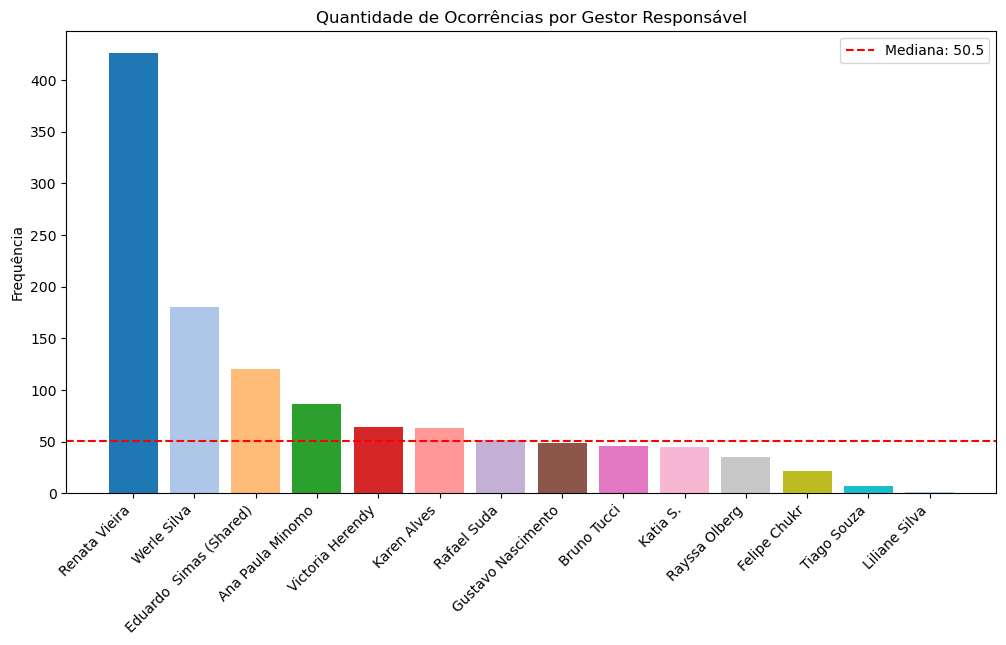

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Criar DataFrame com contagem dos gestores
df_gestores = df['Gestor_Responsavel'].value_counts().reset_index()
df_gestores.columns = ['Gestor_Responsavel', 'Quantidade']

# Gerar uma lista de cores para cada barra
colors = plt.cm.get_cmap("tab20", len(df_gestores))  # Usando uma paleta de 20 cores

# Criar gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(df_gestores['Gestor_Responsavel'], df_gestores['Quantidade'], color=colors(range(len(df_gestores))))

# Adicionar linha da mediana
plt.axhline(y=mediana, color='red', linestyle='--', label=f'Mediana: {mediana}')


# Ajustar rótulos
plt.xticks(rotation=45, ha='right')
plt.ylabel('Frequência')
plt.title('Quantidade de Ocorrências por Gestor Responsável')

# Adicionar legenda
plt.legend()

# Mostrar gráfico
plt.show()


In [ ]:
df_copia = df.copy()

In [ ]:
# Primeiro, garantir que as colunas de valores estejam no formato numérico
df['Valor_final_negociado'] = pd.to_numeric(df['Valor_final_negociado'], errors='coerce')
df['Valor_final_Inicial_de_Cotacao'] = pd.to_numeric(df['Valor_Inicial_de_Cotacao'], errors='coerce')

# Agrupar pelos gestores e somar os valores
df_agrupado = df.groupby('Gestor_Responsavel')[['Valor_final_Inicial_de_Cotacao', 'Valor_final_negociado']].sum().reset_index()

# Se necessário, reformatar as colunas após o agrupamento
df_agrupado['Valor_final_negociado_formatado'] = df_agrupado['Valor_final_negociado'].apply(lambda x: f'{x:,.2f}')
df_agrupado['Valor_final_Inicial_de_Cotacao_formatado'] = df_agrupado['Valor_final_Inicial_de_Cotacao'].apply(lambda x: f'{x:,.2f}')

# Remover as colunas originais sem formatação
df_agrupado.drop(columns=['Valor_final_negociado', 'Valor_final_Inicial_de_Cotacao'], inplace=True)



### Gerando Grafico de Linhas Para analizar!

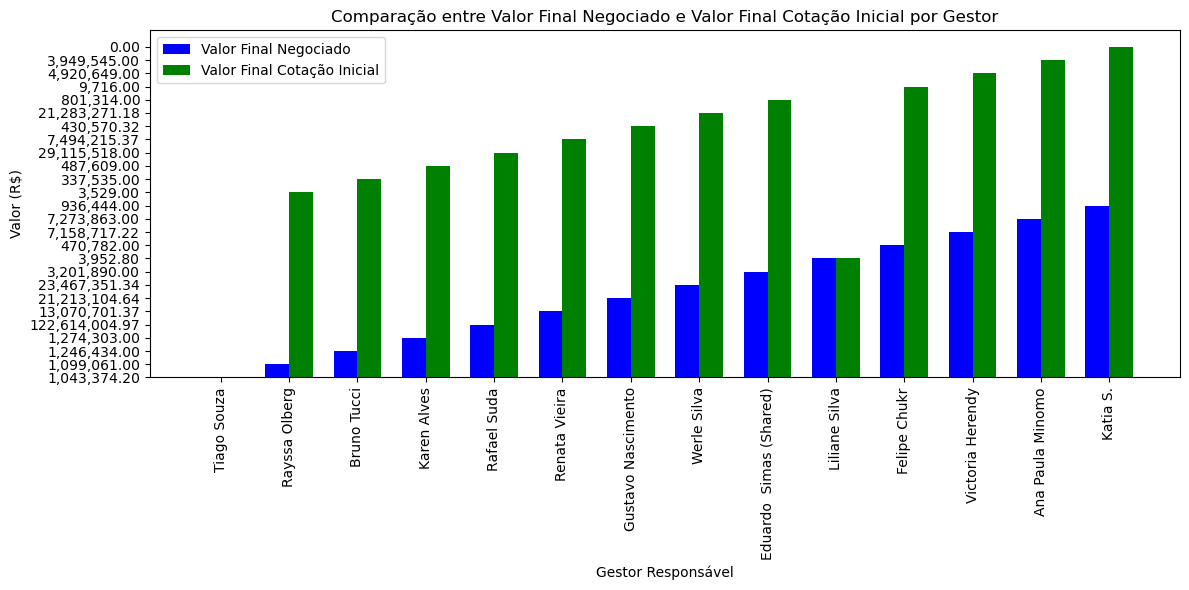

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ordenar os dados para o gráfico (você pode escolher a ordem desejada)
df_agrupado_sorted = df_agrupado.sort_values(by='Valor_final_negociado_formatado')

# Definir largura das barras
bar_width = 0.35

# Definir a posição das barras
index = np.arange(len(df_agrupado_sorted))

# Criar o gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
plt.bar(index, df_agrupado_sorted['Valor_final_negociado_formatado'], bar_width, label='Valor Final Negociado', color='b')
plt.bar(index + bar_width, df_agrupado_sorted['Valor_final_Inicial_de_Cotacao_formatado'], bar_width, label='Valor Final Cotação Inicial', color='g')

# Adicionar título e rótulos
plt.title('Comparação entre Valor Final Negociado e Valor Final Cotação Inicial por Gestor')
plt.xlabel('Gestor Responsável')
plt.ylabel('Valor (R$)')
plt.xticks(index + bar_width / 2, df_agrupado_sorted['Gestor_Responsavel'], rotation=90)
plt.legend()

# Exibir o gráfico
plt.tight_layout()
plt.show()


In [ ]:
print(df_agrupado_sorted[['Proficiencia', 'Diferença']].isna().sum())


Proficiencia    14
Diferença       14
dtype: int64


In [1]:

#df_agrupado.to_csv('E:/ProgramacaoPhyton/DataScience02\DashSiengeAqs/dados/df_agrupado.csv', index=False)
